In [53]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from xgboost import XGBClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import auc
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_curve

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import StratifiedKFold

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

import warnings
warnings.filterwarnings('ignore')
print('-'*25)

-------------------------


In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
gender_submission = pd.read_csv('gender_submission.csv')

## EDA

In [3]:
train.describe().columns

Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
train.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [6]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
train.describe().columns

Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')

In [8]:
df_num= train[['Age', 'SibSp', 'Parch', 'Fare']]
df_cat= train[['Survived', 'Pclass', 'Sex', 'Ticket', 'Cabin', 'Embarked']]

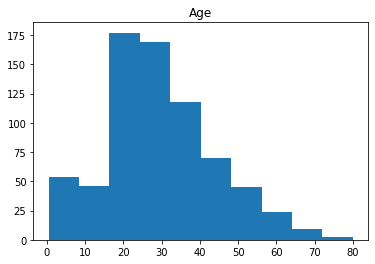

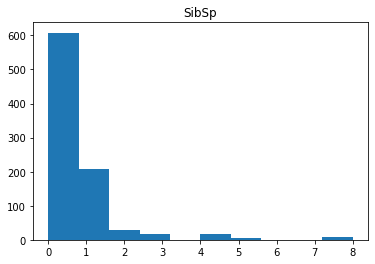

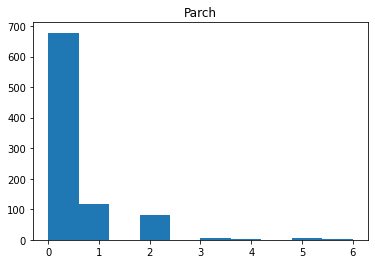

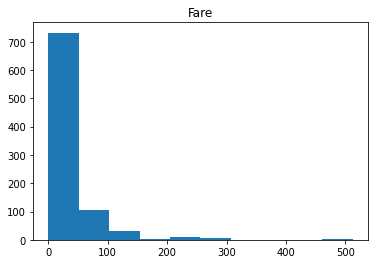

In [9]:
for i in df_num.columns:
    plt.hist(df_num[i])
    plt.title(i)
    plt.show()

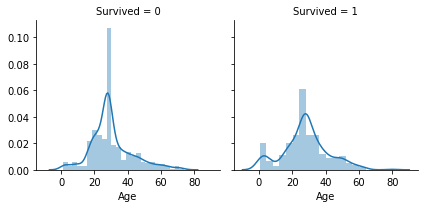

In [81]:
# Explore Age vs Survived
g = sns.FacetGrid(train, col='Survived')
g = g.map(sns.distplot, "Age")

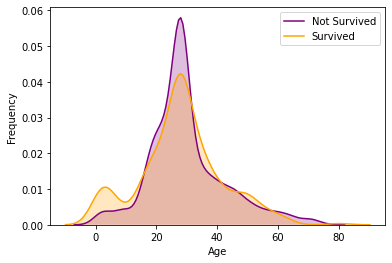

In [89]:
# Explore Age distibution 
g = sns.kdeplot(train["Age"][(train["Survived"] == 0) & (train["Age"].notnull())], color="Purple", shade = True)
g = sns.kdeplot(train["Age"][(train["Survived"] == 1) & (train["Age"].notnull())], ax =g, color="Orange", shade= True)
g.set_xlabel("Age")
g.set_ylabel("Frequency")
g = g.legend(["Not Survived","Survived"])

            Age     SibSp     Parch      Fare
Age    1.000000 -0.308247 -0.189119  0.096067
SibSp -0.308247  1.000000  0.414838  0.159651
Parch -0.189119  0.414838  1.000000  0.216225
Fare   0.096067  0.159651  0.216225  1.000000


<AxesSubplot:>

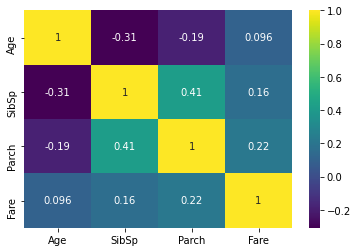

In [100]:
print (df_num.corr())
sns.heatmap(df_num.corr(), cmap = 'viridis', annot=True)

In [11]:
pd.pivot_table(train, index='Survived', values=['Age', 'SibSp', 'Parch', 'Fare'])

,Age,Fare,Parch,SibSp
Survived,,,,
0,30.626179,22.117887,0.329690,0.553734
1,28.343690,48.395408,0.464912,0.473684


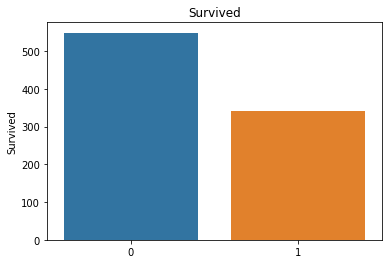

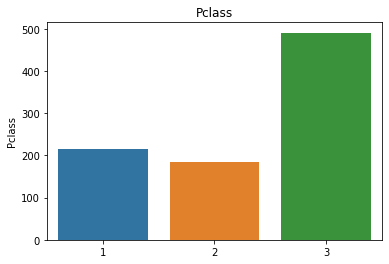

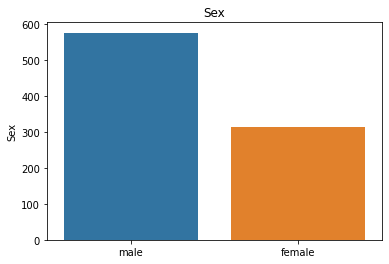

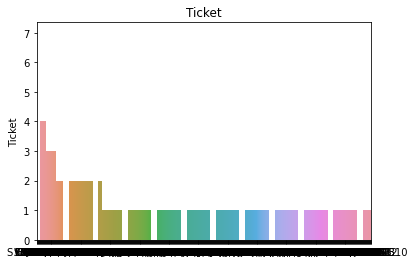

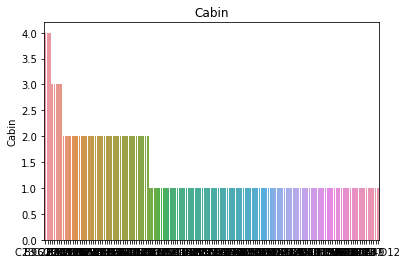

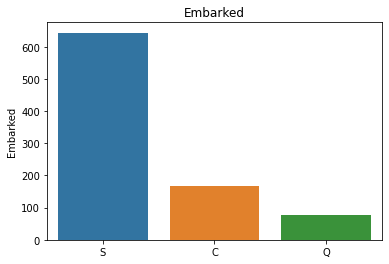

In [12]:
for i in df_cat.columns:
    sns.barplot(df_cat[i]. value_counts().index,df_cat[i].value_counts()).set_title(i)
    plt.show()

In [13]:
print(pd.pivot_table(train, index='Survived', columns='Pclass', values= 'Ticket', aggfunc='count'))
print()
print(pd.pivot_table(train, index= 'Survived', columns= 'Sex', values= 'Ticket', aggfunc='count'))
print()
print(pd.pivot_table(train, index= 'Survived', columns= 'Embarked', values= 'Ticket', aggfunc='count'))


Pclass      1   2    3
Survived              
0          80  97  372
1         136  87  119

Sex       female  male
Survived              
0             81   468
1            233   109

Embarked   C   Q    S
Survived             
0         75  47  427
1         93  30  217


In [14]:
df_cat.Cabin
train['cabin_multiple']= train.Cabin.apply(lambda x: 0 
                                           if pd.isna(x) 
                                           else len(x.split(' ')))
train['cabin_multiple'].value_counts()

0    687
1    180
2     16
3      6
4      2
Name: cabin_multiple, dtype: int64

In [15]:
print(pd.pivot_table(train, index= 'Survived', columns= 'cabin_multiple', values= 'Ticket', aggfunc='count'))

cabin_multiple      0      1    2    3    4
Survived                                   
0               481.0   58.0  7.0  3.0  NaN
1               206.0  122.0  9.0  3.0  2.0


In [16]:
train['cabin_adv']=train.Cabin.apply(lambda x: str(x)[0])

In [17]:
print(train.cabin_adv.value_counts())
pd.pivot_table(train, index= 'Survived', columns='cabin_adv',values='Name', aggfunc='count')

n    687
C     59
B     47
D     33
E     32
A     15
F     13
G      4
T      1
Name: cabin_adv, dtype: int64


cabin_adv,A,B,C,D,E,F,G,T,n
Survived,,,,,,,,,
0,8.0,12.0,24.0,8.0,8.0,5.0,2.0,1.0,481.0
1,7.0,35.0,35.0,25.0,24.0,8.0,2.0,NaN,206.0


In [18]:
train['numeric_ticket']= train.Ticket.apply(lambda x:1 if x.isnumeric() else 0)
train['ticket_letters']= train.Ticket.apply(lambda x:''.join(x.split(' ')[:-1]).replace ('.',' ').replace('/',' ').lower() if len(x.split(' ')[:-1]) >0 else 0)

In [19]:
train['numeric_ticket'].value_counts()

1    661
0    230
Name: numeric_ticket, dtype: int64

In [21]:
pd.pivot_table(train,index='Survived',columns='numeric_ticket', values = 'Ticket', aggfunc='count')

numeric_ticket,0,1
Survived,,
0,142,407
1,88,254


In [22]:
pd.pivot_table(train,index='Survived',columns='ticket_letters', values = 'Ticket', aggfunc='count')

ticket_letters,0,a 5,a 4,a 4,a 5,a 5,a s,a4,c,c a,...,so c,soton o q,soton o2,soton oq,ston o2,sw pp,w c,w c,w e p,we p
Survived,,,,,,,,,,,,,,,,,,,,,
0,410.0,2.0,3.0,3.0,9.0,8.0,1.0,1.0,3.0,14.0,...,NaN,7.0,2.0,6.0,10.0,NaN,8.0,1.0,1.0,1.0
1,255.0,NaN,NaN,NaN,1.0,1.0,NaN,NaN,2.0,13.0,...,1.0,1.0,NaN,1.0,8.0,1.0,1.0,NaN,NaN,1.0


In [23]:
train.Name.head(50)
train['name_title'] = train.Name.apply(lambda x: x.split(',')[1].split('.')[0].strip())
test['name_title'] = test.Name.apply(lambda x: x.split(',')[1].split('.')[0].strip())

In [24]:
train['name_title'].value_counts()

Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Mlle              2
Major             2
Col               2
Capt              1
Jonkheer          1
Ms                1
Don               1
Sir               1
the Countess      1
Lady              1
Mme               1
Name: name_title, dtype: int64

In [25]:
print(pd.pivot_table(train, index= 'Survived', columns= 'name_title', values= 'Ticket', aggfunc='count'))

name_title  Capt  Col  Don   Dr  Jonkheer  Lady  Major  Master   Miss  Mlle  \
Survived                                                                      
0            1.0  1.0  1.0  4.0       1.0   NaN    1.0    17.0   55.0   NaN   
1            NaN  1.0  NaN  3.0       NaN   1.0    1.0    23.0  127.0   2.0   

name_title  Mme     Mr   Mrs   Ms  Rev  Sir  the Countess  
Survived                                                   
0           NaN  436.0  26.0  NaN  6.0  NaN           NaN  
1           1.0   81.0  99.0  1.0  NaN  1.0           1.0  


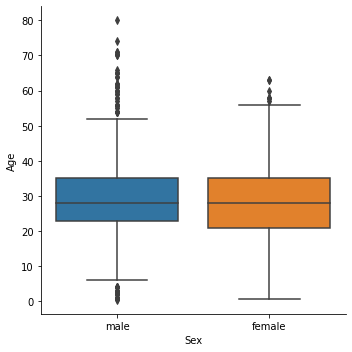

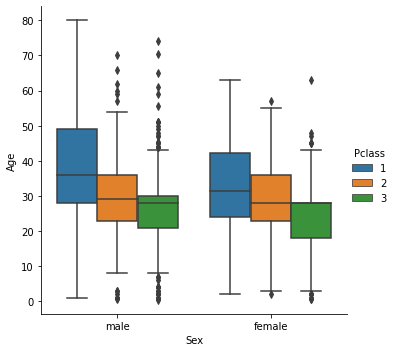

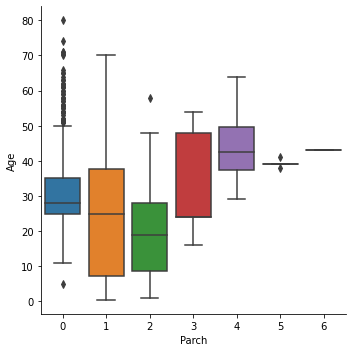

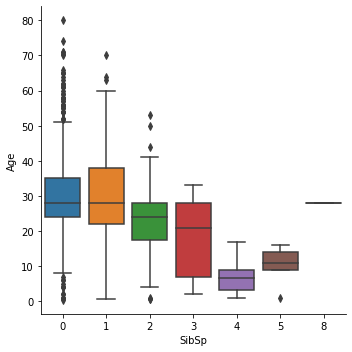

In [86]:
# Explore Age vs Sex, Parch , Pclass and SibSP
g = sns.factorplot(y="Age",x="Sex",data=train,kind="box")
g = sns.factorplot(y="Age",x="Sex",hue="Pclass", data=train,kind="box")
g = sns.factorplot(y="Age",x="Parch", data=train,kind="box")
g = sns.factorplot(y="Age",x="SibSp", data=train,kind="box")

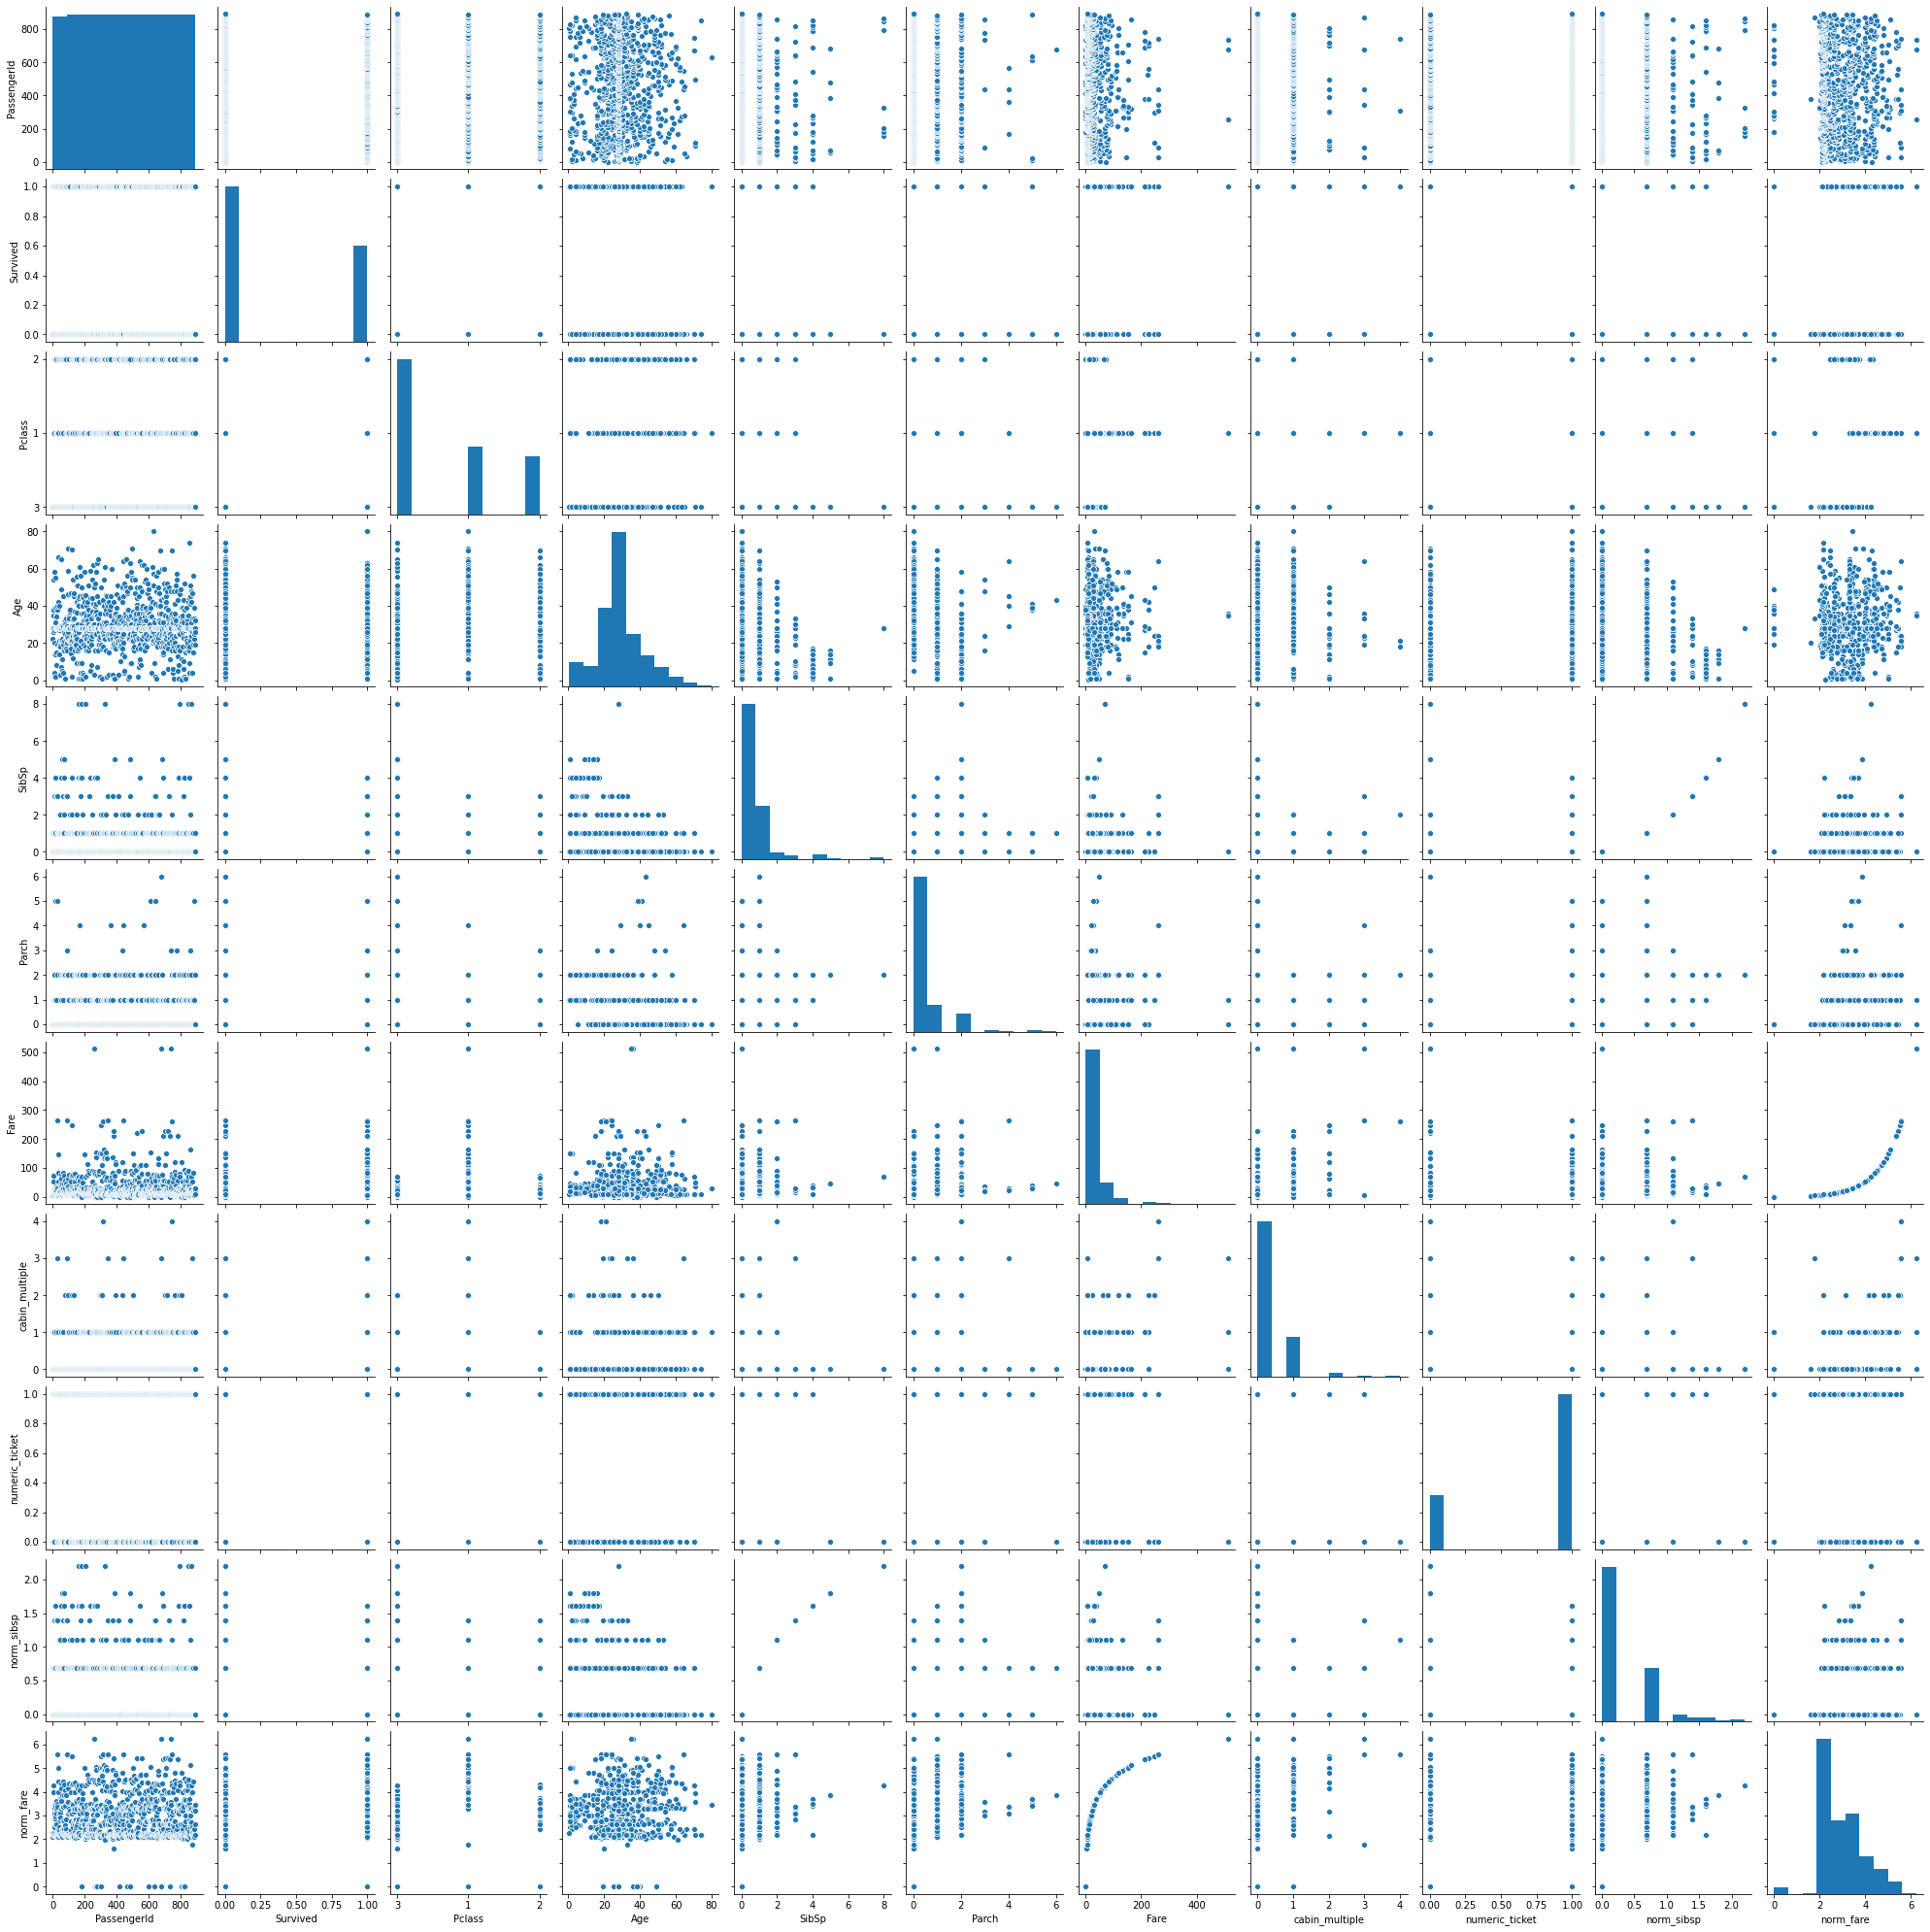

In [97]:
#Visualize each variables comparision to the another
sns.pairplot(train)
plt.show()

## Feature Engineering

In [26]:
#create all categorical variables that we did above for both training and test sets 
train['cabin_multiple'] = train.Cabin.apply(lambda x: 0 if pd.isna(x) else len(x.split(' ')))
train['cabin_adv'] = train.Cabin.apply(lambda x: str(x)[0])
train['numeric_ticket'] = train.Ticket.apply(lambda x: 1 if x.isnumeric() else 0)
train['ticket_letters'] = train.Ticket.apply(lambda x: ''.join(x.split(' ')[:-1]).replace('.','').replace('/','').lower() if len(x.split(' ')[:-1]) >0 else 0)
train['name_title'] = train.Name.apply(lambda x: x.split(',')[1].split('.')[0].strip())

test['cabin_multiple'] = test.Cabin.apply(lambda x: 0 if pd.isna(x) else len(x.split(' ')))
test['cabin_adv'] = test.Cabin.apply(lambda x: str(x)[0])
test['numeric_ticket'] = test.Ticket.apply(lambda x: 1 if x.isnumeric() else 0)
test['ticket_letters'] = test.Ticket.apply(lambda x: ''.join(x.split(' ')[:-1]).replace('.','').replace('/','').lower() if len(x.split(' ')[:-1]) >0 else 0)
test['name_title'] = test.Name.apply(lambda x: x.split(',')[1].split('.')[0].strip())

#impute nulls for continuous data 
train.Age = train.Age.fillna(train.Age.median())
test.Age = test.Age.fillna(train.Age.median())
train.Fare = train.Fare.fillna(train.Fare.median())
test.Fare = test.Fare.fillna(train.Fare.median())

#drop null 'embarked' rows. Only 2 instances of this in training and 0 in test 
train.dropna(subset=['Embarked'],inplace = True)

#log norm of sibsp
train['norm_sibsp'] = np.log(train.SibSp+1)
test['norm_sibsp'] = np.log(test.SibSp+1)


# log norm of fare (used)
train['norm_fare'] = np.log(train.Fare+1)
test['norm_fare'] = np.log(test.Fare+1)

# converted fare to category for pd.get_dummies()
train.Pclass = train.Pclass.astype(str)
test.Pclass = test.Pclass.astype(str)

#created dummy variables from categories (also can use OneHotEncoder)
train_dummies = pd.get_dummies(train[['Pclass','Sex','Age','SibSp','Parch','norm_fare','Embarked','cabin_adv','cabin_multiple','numeric_ticket','name_title']])
test_dummies = pd.get_dummies(test[['Pclass','Sex','Age','SibSp','Parch','norm_fare','Embarked','cabin_adv','cabin_multiple','numeric_ticket','name_title']])

In [27]:
# Scale data 
scale = StandardScaler()
X_train_scaled = train_dummies.copy()
X_test_scaled = train_dummies.copy()

X_train_scaled[['Age','SibSp','Parch','norm_fare']]= scale.fit_transform(X_train_scaled[['Age','SibSp','Parch','norm_fare']])
X_test_scaled[['Age','SibSp','Parch','norm_fare']]= scale.fit_transform(X_test_scaled[['Age','SibSp','Parch','norm_fare']])

In [28]:
y_train = train['Survived']
y_train.shape

(889,)

## Build Models

In [29]:
# Cross validate model with Kfold stratified cross val
kfold = StratifiedKFold(n_splits=10)

In [30]:
def clf_performance(classifier, model_name):
    print(model_name)
    print('Best Score: ' + str(classifier.best_score_))
    print('Best Parameters: ' + str(classifier.best_params_))

In [31]:
def modelfit(alg, X_train_scaled, X_test_scaled, y_train, performCV=True, printFeatureImportance=True, cv_folds=kfold):
    #Fit the algorithm on the data
    alg.fit(X_train_scaled, y_train)
        
    #Predict training set:
    predictions = alg.predict(X_train_scaled)
    predprob = alg.predict_proba(X_train_scaled)[:,1]
    
    #Perform cross-validation:
    if performCV:
        cv_score = cross_val_score(alg, X_train_scaled, y_train, cv=cv_folds, scoring='roc_auc')
    
    #Print model report:
    print ("\nModel Report")
    print ("Accuracy : %.4g" % accuracy_score(y_train.values, predictions))
    print ("AUC Score (Train): %f" % roc_auc_score(y_train, predprob))
    
    if performCV:
        print ("CV Score : Mean - %.7g | Std - %.7g | Min - %.7g | Max - %.7g" % (np.mean(cv_score),np.std(cv_score),np.min(cv_score),np.max(cv_score))) 
    #Print Feature Importance:
    if printFeatureImportance:
        feat_imp = pd.Series(alg.feature_importances_, X_train_scaled.columns).sort_values(ascending=False)
        feat_imp.plot(kind='bar', title='Feature Importances')
        plt.ylabel('Feature Importance Score')

### Random Forest

In [32]:
rf = RandomForestClassifier()
rf.fit(X_train_scaled, y_train)
y_pred = rf.predict(X_test_scaled)
random_forest_accy = round(rf.score(X_train_scaled, y_train) * 100, 3)
print(random_forest_accy)

98.763


In [33]:
param_grid =  {'n_estimators':[100, 200, 300],
               'criterion':['gini','entropy'],
               'max_depth': [15, 20, None],
               'max_features': ['auto','sqrt', 10]
              }
                                  
rf_search = GridSearchCV(rf,param_grid = param_grid, cv=kfold, scoring="accuracy", n_jobs= 1, verbose = 1)

rf_search.fit(X_train_scaled,y_train)

best_rf = rf_search.best_estimator_

# Best score
rf_search.best_score_

Fitting 10 folds for each of 54 candidates, totalling 540 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 540 out of 540 | elapsed:  3.7min finished


0.8177987742594484

In [107]:
print(best_rf)

RandomForestClassifier(max_depth=15, max_features=10, n_estimators=300)



Model Report
Accuracy : 0.9753
AUC Score (Train): 0.996778
CV Score : Mean - 0.8613854 | Std - 0.06735934 | Min - 0.7005348 | Max - 0.9387701


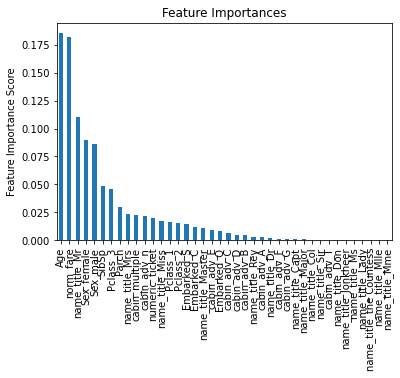

In [34]:
modelfit(best_rf, X_train_scaled, X_test_scaled, y_train)

##### Random Forest developed an accuracy score of 99%. However, the score decreased once tested against the test set. In this tree, age became the greatest factor contributing to survival and then the price of the fare.

### Gradient Boost

In [35]:
gbc = GradientBoostingClassifier()
gbc.fit(X_train_scaled, y_train)
y_pred = gbc.predict(X_test_scaled)
gradient_accy = round(gbc.score(X_train_scaled, y_train) * 100, 3)
print(gradient_accy)

91.114


In [36]:
#Search grid for optimal parameters
param_grid = {'loss' : ['deviance', 'exponential'],
              'n_estimators' : [100,200,300],
              'max_depth': [10, 20, None],
              'max_features': ['auto', 'sqrt', 10] 
              }

gbc_search = GridSearchCV(gbc,param_grid = param_grid, cv=kfold, scoring="accuracy", verbose = 1)

gbc_search.fit(X_train_scaled,y_train)

best_gbc = gbc_search.best_estimator_

# Best score
gbc_search.best_score_

Fitting 10 folds for each of 54 candidates, totalling 540 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 540 out of 540 | elapsed: 18.2min finished


0.817773237997957

In [108]:
print(best_gbc)

GradientBoostingClassifier(loss='exponential', max_depth=10,
                           max_features='auto', n_estimators=200)



Model Report
Accuracy : 0.9876
AUC Score (Train): 0.999596
CV Score : Mean - 0.8533482 | Std - 0.06924959 | Min - 0.6989305 | Max - 0.9256684


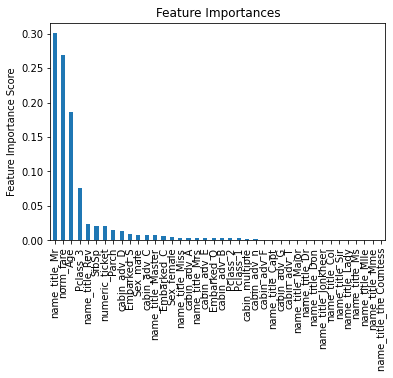

In [37]:
modelfit(best_gbc, X_train_scaled, X_test_scaled, y_train)

##### Gradient boost recieved similar scores compared to random forest. The gradient boost tree determined that the name title of Mr was the most important factor contributing to survival. This supports that there were much more men on the ship. Therefore, a larger number of men survived compared to other factors.

### Extra Trees

In [38]:
ext = ExtraTreesClassifier()
ext.fit(X_train_scaled, y_train)
y_pred = ext.predict(X_test_scaled)
extraTree_accy = round(ext.score(X_train_scaled, y_train) * 100, 3)
print(extraTree_accy)

98.763


In [39]:
#Search grid for optimal parameters
param_grid = {"max_depth": [10,20, None],
              "max_features": ['auto', 'sqrt', 10],
              "n_estimators" :[100, 200, 300],
              "criterion": ['gini', 'entropy']}


ext_search = GridSearchCV(ext,param_grid = param_grid, cv=kfold, scoring="accuracy", verbose = 1)

ext_search.fit(X_train_scaled, y_train)

best_ext = ext_search.best_estimator_

# Best score
ext_search.best_score_

Fitting 10 folds for each of 54 candidates, totalling 540 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 540 out of 540 | elapsed:  3.1min finished


0.8279111338100102

In [110]:
print(best_ext)

ExtraTreesClassifier(criterion='entropy', max_depth=10, max_features='sqrt')



Model Report
Accuracy : 0.91
AUC Score (Train): 0.951819
CV Score : Mean - 0.8727322 | Std - 0.04602205 | Min - 0.7673797 | Max - 0.9374332


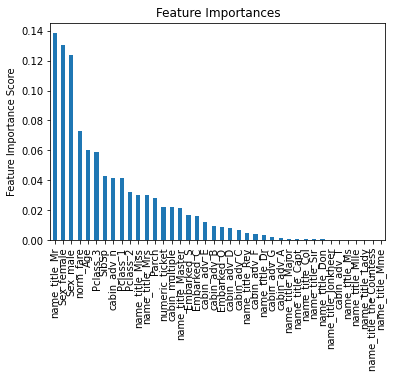

In [40]:
modelfit(best_ext, X_train_scaled, X_test_scaled, y_train)

#### ExtraTrees proved to be more stable than Random Forest and Gradient Boost. The initial accuracy score was lower than the other two but, retained a higher score against the cross-validated data. ExtraTrees came to the same decision as gradient boost on the importance of the title of mr.

### XGBoost

In [41]:
xgb = XGBClassifier()
xgb.fit(X_train_scaled, y_train)
y_pred = xgb.predict(X_test_scaled)
XGBClassifier_accy = round(xgb.score(X_train_scaled, y_train) * 100, 3)
print(XGBClassifier_accy)

96.85


In [114]:
#Search grid for optimal parameters
param_grid = {'n_estimators': [100, 200, 300],
              'tree_method': ['auto', 'exact', 'approx'],
              'max_depth': [10, 20, None]              
             }
xgb_search = GridSearchCV(xgb, param_grid = param_grid, cv =kfold, verbose=1)

xgb_search.fit(X_train_scaled, y_train)

best_xgb = xgb_search.best_estimator_

# Best score
xgb_search.best_score_

Fitting 10 folds for each of 27 candidates, totalling 270 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 270 out of 270 | elapsed:  1.6min finished


0.8166624106230849

In [111]:
print(best_xgb)

XGBClassifier(algorithm='SAMME', base_score=0.5, booster='gbtree',
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              gamma=0, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=0,
              num_parallel_tree=1, random_state=0, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=1, tree_method='exact',
              validate_parameters=1, verbosity=None)



Model Report
Accuracy : 0.9685
AUC Score (Train): 0.995754
CV Score : Mean - 0.8552822 | Std - 0.06587115 | Min - 0.7069519 | Max - 0.9272727


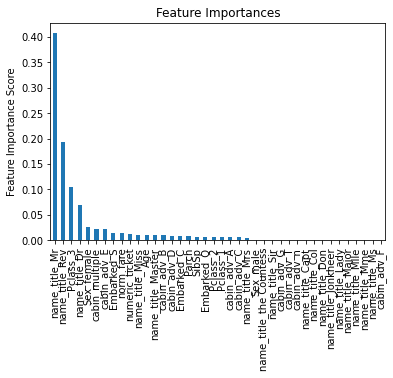

In [44]:
modelfit(best_xgb , X_train_scaled, X_test_scaled, y_train)

#### The XGBoost model's performance was similar to the gradient boost. Although XGB enables more hyperparameter tuning, the undelying process is the same. The two models chose that the name_title mr. was an important varaiable but, came to different conclusion on the remaining variables. 

### ADABoost

In [45]:
ada = AdaBoostClassifier()
ada.fit(X_train_scaled, y_train)
y_pred = ada.predict(X_test_scaled)
AdaBoost_accy = round(ada.score(X_train_scaled, y_train) * 100, 3)
print(AdaBoost_accy)

84.364


In [46]:
param_grid = {"n_estimators" :[100, 200, 300],
              'algorithm':['SAMME', 'SAMME.R']}

In [47]:
ada_search = GridSearchCV(ada, param_grid = param_grid, cv=kfold, scoring="accuracy", verbose = 1)

ada_search.fit(X_train_scaled, y_train)

best_ada = ada_search.best_estimator_

Fitting 10 folds for each of 6 candidates, totalling 60 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:   26.6s finished


In [112]:
print(best_ada)

AdaBoostClassifier(algorithm='SAMME', n_estimators=300)



Model Report
Accuracy : 0.829
AUC Score (Train): 0.883834
CV Score : Mean - 0.8601545 | Std - 0.05137713 | Min - 0.7224599 | Max - 0.9042781


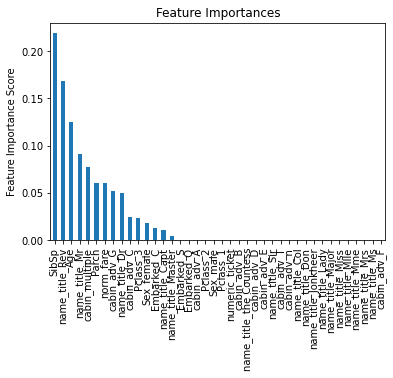

In [48]:
modelfit(best_ada, X_train_scaled, X_test_scaled, y_train)

#### AdaBoost retained the most efficiency when cross-validated against the test set. AdaBoost determined that having siblings/spouses contributed the most to survival. This indicates that women and children were also protected to increase their survival on from the ship. 

### Ensemble

In [49]:
#Create ensemble based on best parameters of the previous models
votingC = VotingClassifier(estimators=[('rf', best_rf), ('gbc',best_gbc),('ext', best_ext),('xgb', best_xgb),
                                       ('ada',best_ada)], voting='soft')

votingC = votingC.fit(X_train_scaled, y_train)

predictions = votingC.predict(X_test_scaled)
predprob = votingC.predict_proba(X_train_scaled)[:,1]

In [56]:
# Display the metric scores for the enemble
print ("VotingC Model Report")
print ("Accuracy : %.4g" % accuracy_score(y_train.values, predictions))
print ("AUC Score (Train): %f" % roc_auc_score(y_train, predprob))
print ("F1 Score : %.4g" % f1_score(y_train.values, predictions))

VotingC Model Report
Accuracy : 0.9786
AUC Score (Train): 0.997715
F1 Score : 0.9713


## Submission

In [76]:
#Submit Random forest
best_rf
y_preds_rf = best_rf.predict(X_test_scaled).astype(int)
rf_predictions = y_preds_rf[:418]
rf_submission = {'PassengerId': test.PassengerId, 'Survived': rf_predictions}
submission_rf = pd.DataFrame(data=rf_submission)
submission_rf.to_csv('rf_submission.csv', index=False)

In [78]:
#Submit Gradient Boost
y_preds_gbc = best_gbc.predict(X_test_scaled).astype(int)
gbc_predictions = y_preds_gbc[:418]
gbc_submission = {'PassengerId': test.PassengerId, 'Survived': gbc_predictions}
submission_gbc = pd.DataFrame(data=gbc_submission)
submission_gbc.to_csv('gbc_submission.csv', index=False)

In [79]:
#Submit XGboost
y_preds_xgb = best_xgb.predict(X_test_scaled).astype(int)
xgb_predictions = y_preds_gbc[:418]
xgb_submission = {'PassengerId': test.PassengerId, 'Survived': xgb_predictions}
submission_xgb = pd.DataFrame(data=xgb_submission)
submission_xgb.to_csv('xgb_submission.csv', index=False)

In [80]:
#Submit the Ensemble
y_preds_votingC = votingC.predict(X_test_scaled).astype(int)
voting_predictions = y_preds_votingC[:418]
voting_submission = {'PassengerId': test.PassengerId, 'Survived':voting_predictions}
submission_votingC = pd.DataFrame(data=voting_submission)
submission_votingC.to_csv('ensemble_submission.csv', index=False)